#                                        Data Analytics Internship  @ EDQI

#### Name:  Rohit Kamalay

##### Event Based Data Analysis

##### Import Statements

In [96]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


#### Fetching the Data

In [97]:
df=pd.read_csv('shopping_dataset.csv')
print("data imported successfully")

data imported successfully


In [98]:
df.columns

Index(['id', 'userid', 'newuser', 'date', 'time', 'action', 'productid',
       'producte', 'category', 'price', 'discount', 'profit', 'age', 'gender',
       'location'],
      dtype='object')

## Displaying 10 rows

In [99]:
df.head(7)

,id,userid,newuser,date,time,action,productid,producte,category,price,discount,profit,age,gender,location
0,241,78901,no,2022-04-06,5:45,purchase,1003,Fress,Clothing,80,0.00,8.0,42,Male,"Mi, FL"
1,149,56789,yes,2022-05-13,5:45,browse,1009,Skirt,Clothing,45,0.05,4.5,34,Male,"Phoenix, AZ"
2,149,56789,yes,2022-05-13,5:45,browse,1009,Skirt,Clothing,45,0.05,4.5,34,Male,"Phoenix, AZ"
3,72,90123,no,2022-03-16,2:30,addtocart,1003,Sweatshirt,Clothing,40,0.10,4.0,36,Male,"Austin, TX"
4,198,90123,no,2022-05-18,8:00,purchase,1008,Dress,Clothing,90,0.00,9.0,38,Female,"Washington, D.C."
5,56,23456,yes,2022-05-13,2:30,addtocart,1013,Skirt,Clothing,45,0.05,4.5,22,Female,"Portland, OR"
6,223,78901,no,2022-07-31,11:15,purchase,1004,Sweater,Clothing,70,0.00,3.5,39,Male,"New York, NY"


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         5000 non-null   int64  
 1   userid     5000 non-null   int64  
 2   newuser    5000 non-null   object 
 3   date       5000 non-null   object 
 4   time       5000 non-null   object 
 5   action     5000 non-null   object 
 6   productid  5000 non-null   int64  
 7   producte   5000 non-null   object 
 8   category   5000 non-null   object 
 9   price      5000 non-null   int64  
 10  discount   5000 non-null   float64
 11  profit     5000 non-null   float64
 12  age        5000 non-null   int64  
 13  gender     5000 non-null   object 
 14  location   5000 non-null   object 
dtypes: float64(2), int64(5), object(8)
memory usage: 586.1+ KB


## Data Cleaning

In [101]:
df.nunique()

id           220
userid         9
newuser        2
date         238
time          50
action         3
productid     25
producte      46
category       5
price         28
discount       5
profit        37
age           35
gender         3
location      28
dtype: int64

In [102]:
df.isnull().sum()

id           0
userid       0
newuser      0
date         0
time         0
action       0
productid    0
producte     0
category     0
price        0
discount     0
profit       0
age          0
gender       0
location     0
dtype: int64

In [103]:
df.shape

(5000, 15)

In [104]:
df.duplicated().sum()

3281

In [105]:
df=df.drop_duplicates()

In [106]:
df.shape

(1719, 15)

## Data visualisation

In [107]:
# convert all text to lowercase
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)


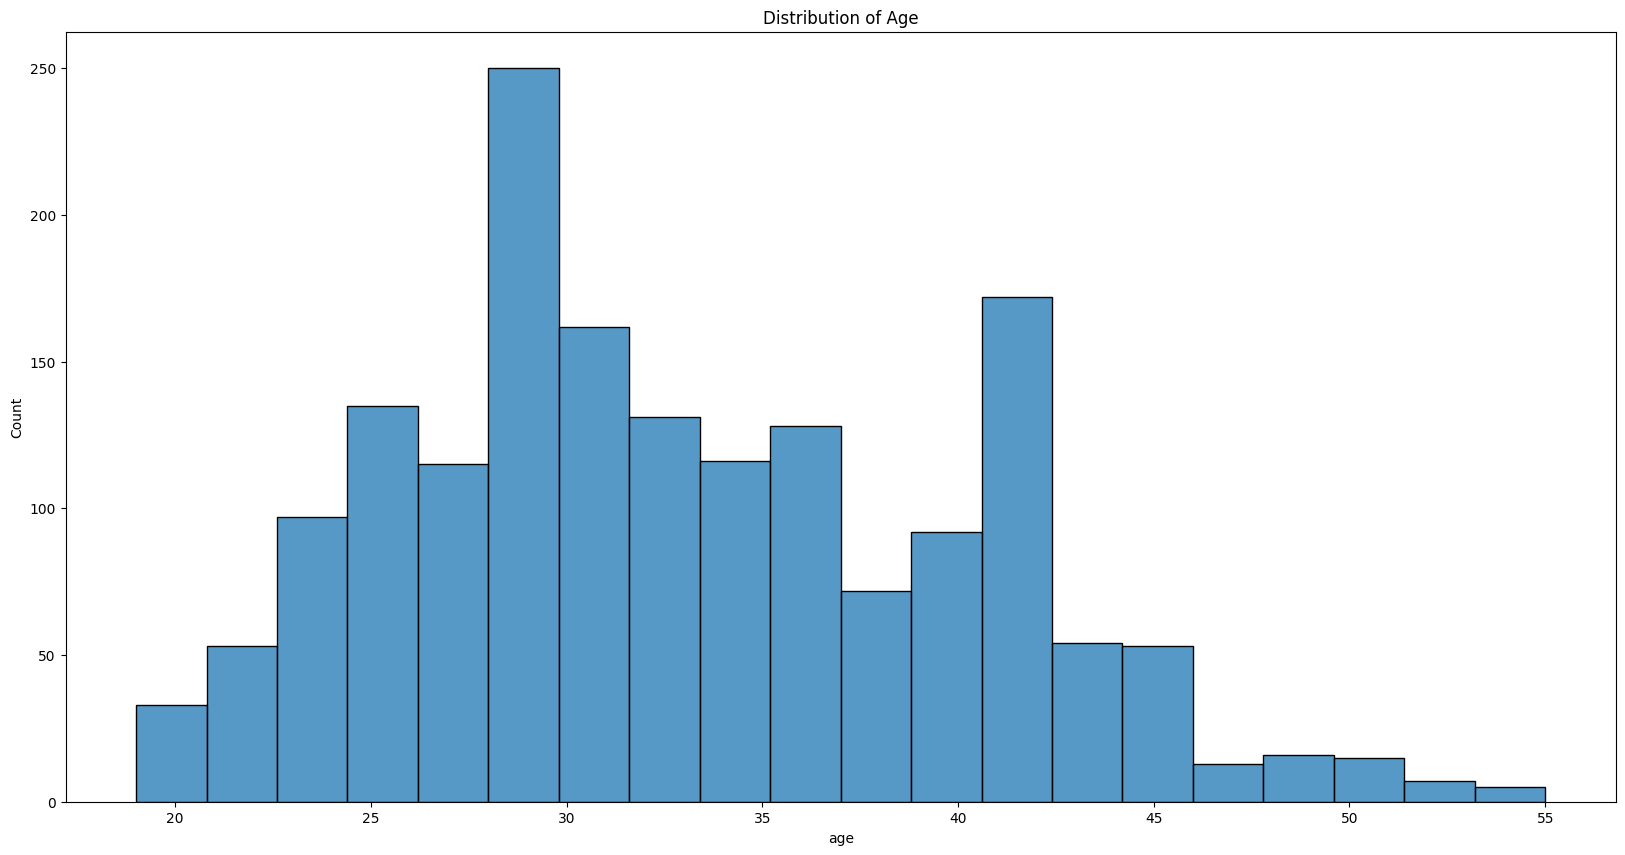

In [108]:
plt.figure(figsize=[20,10])
# plot the distribution of age
sns.histplot(data=df, x='age')
plt.title('Distribution of Age')
plt.show()

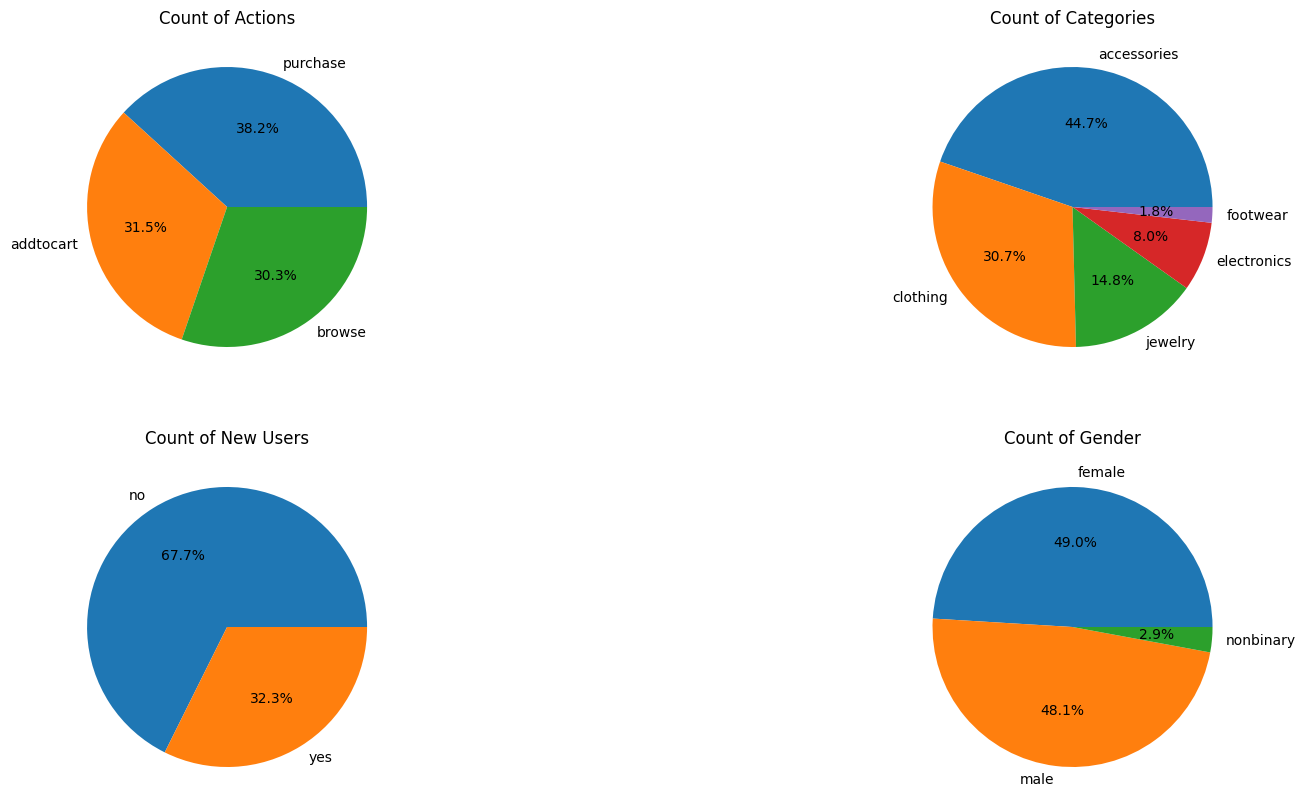

In [109]:
plt.figure(figsize=[20,10])
plt.subplot(2,2,1)
# Count of actions
actions_count = df['action'].value_counts()
plt.pie(actions_count, labels=actions_count.index, autopct='%1.1f%%')
plt.title('Count of Actions')


plt.subplot(2,2,2)
# Count of categories
categories_count = df['category'].value_counts()
plt.pie(categories_count, labels=categories_count.index, autopct='%1.1f%%')
plt.title('Count of Categories')


plt.subplot(2,2,3)
# Count of new users
new_users_count = df['newuser'].value_counts()
plt.pie(new_users_count, labels=new_users_count.index, autopct='%1.1f%%')
plt.title('Count of New Users')

plt.subplot(2,2,4)
# Count of gender
gender_count = df['gender'].value_counts()
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.title('Count of Gender')
plt.show()


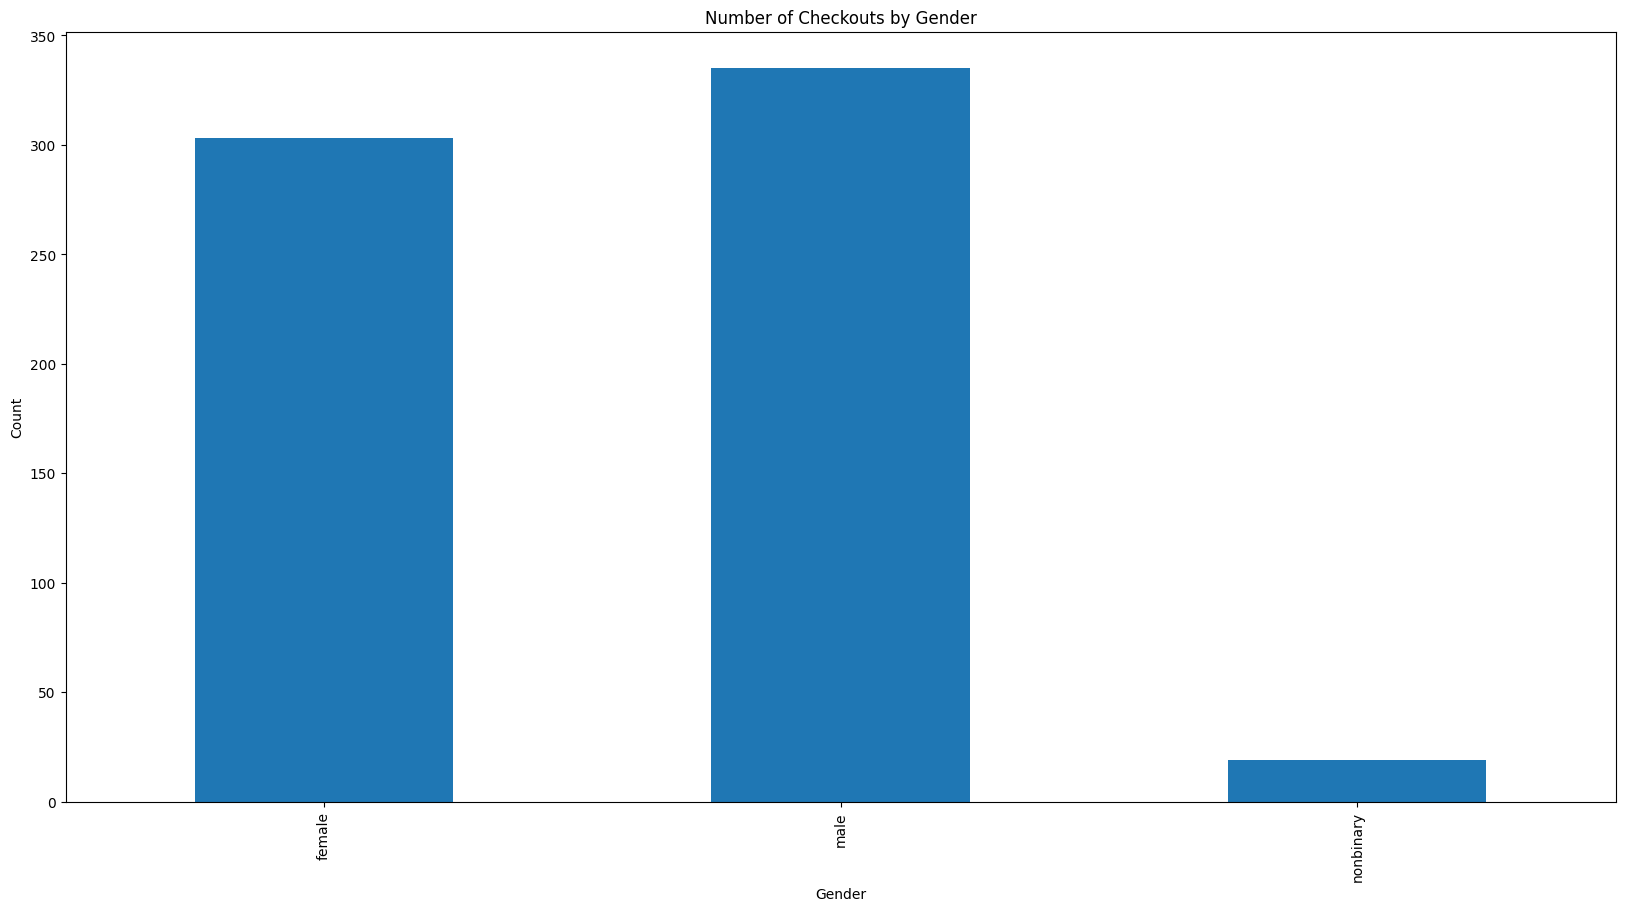

In [110]:
plt.figure(figsize=[20,10])
# Filter the dataset to include only checkout actions
checkout_df = df[df['action'] == 'purchase']

# Group the data by gender and calculate the count of each gender
gender_counts = checkout_df.groupby('gender')['gender'].count()

# Plot the results as a bar chart
gender_counts.plot(kind='bar')
plt.title('Number of Checkouts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

0.942


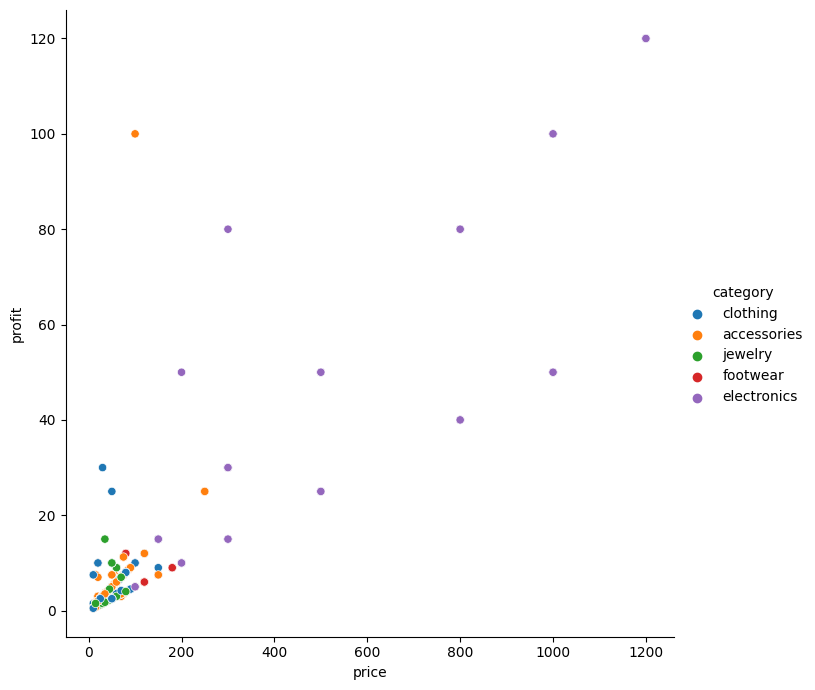

In [111]:
sns.relplot(x='price',y='profit',data=df,hue='category',height=7)
print(np.round(df['price'].corr(df['profit']),3))
plt.show()

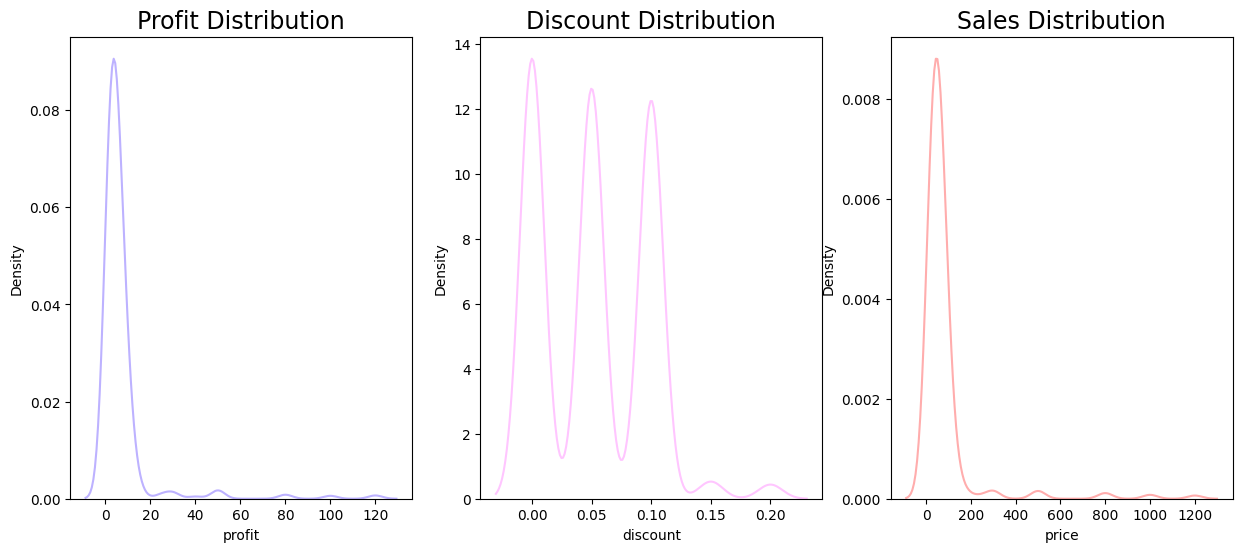

In [112]:
plt.figure(figsize=[15,6])


plt.subplot(1,3,1)
sns.kdeplot(df['profit'],color='#bdb2ff')
plt.title('Profit Distribution',fontsize=17)


plt.subplot(1,3,2)
sns.kdeplot(df['discount'],color='#ffc6ff')
plt.title('Discount Distribution',fontsize=17)


plt.subplot(1,3,3)
sns.kdeplot(df['price'],color='#ffadad')
plt.title('Sales Distribution',fontsize=17)


plt.show()

##### Here the profit is left skewed while the sales is also left skewed

				Analysis of different parameters based on category


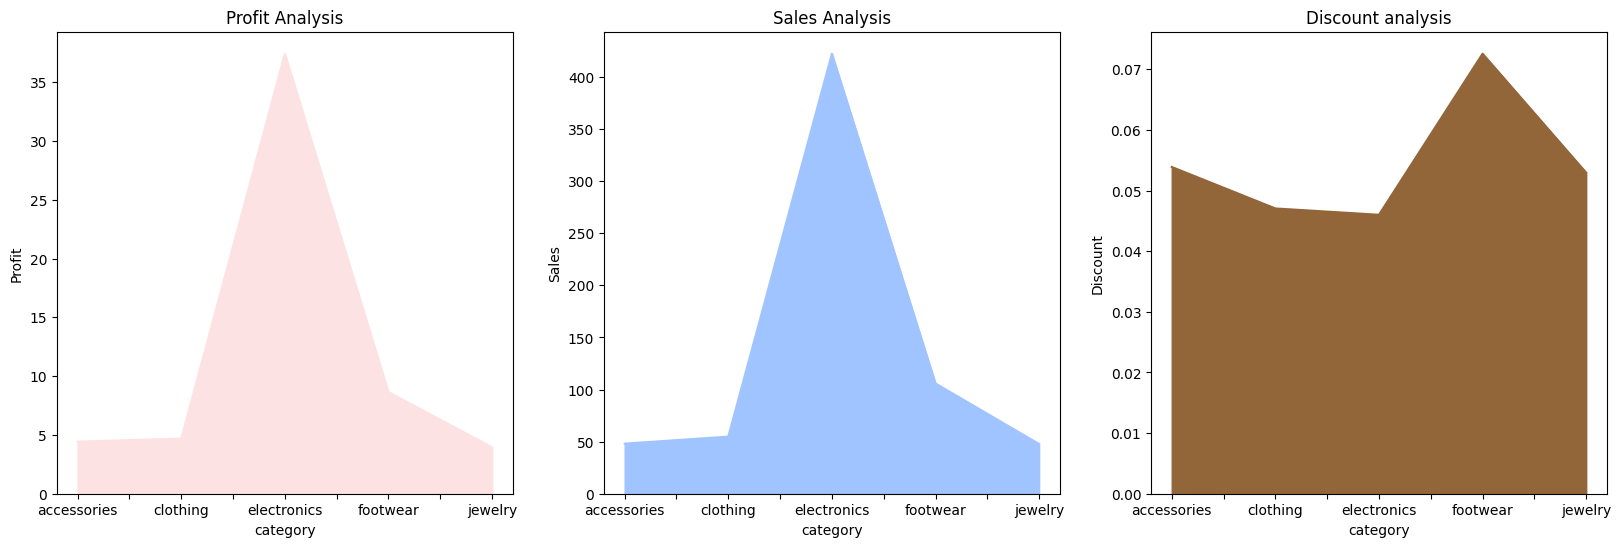

In [113]:
category=df.groupby(['category'])[['profit','discount','price']].mean()

print('\t\t\t\tAnalysis of different parameters based on category')


plt.subplot(1,3,1)
category['profit'].plot(kind='area',figsize=[20,6],color='#fde2e4',title='Profit Analysis',ylabel='Profit')


plt.subplot(1,3,2)
category['price'].plot(kind='area',figsize=[20,6],color='#a0c4ff',title='Sales Analysis',ylabel='Sales')


plt.subplot(1,3,3)
category['discount'].plot(kind='area',figsize=[20,6],color='#936639',title='Discount analysis',ylabel='Discount')


plt.show()

###### From this Graph we can say that:
###### 1.electronics has higher returns and profits while it has less discounts
###### 2.Footwear has low profits but satisfactory sales as the discount given is high

				Analysis of different parameters based on Discount


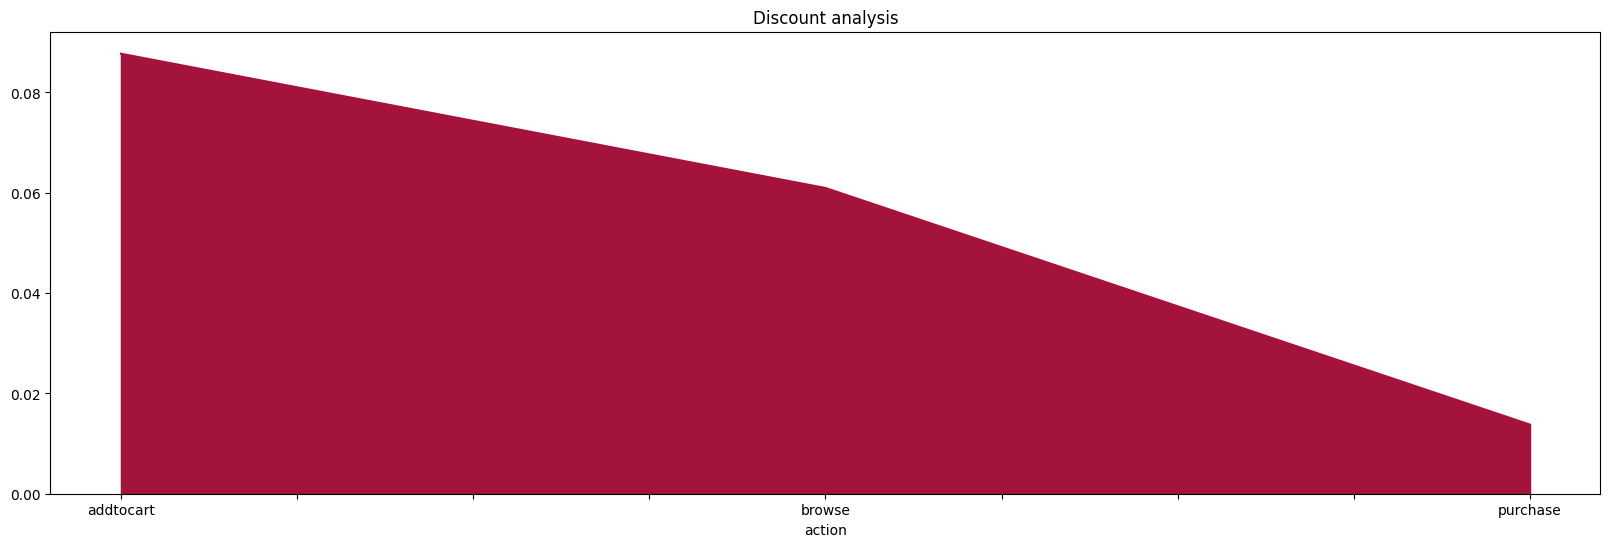

In [114]:

ship=df.groupby(['action'])[['discount']].mean()

print('\t\t\t\tAnalysis of different parameters based on Discount')
ship['discount'].plot(kind='area',figsize=[20,6],title='Discount analysis',color='#a4133c')


plt.show()

### What is the most common action taken by users on the shopping site?

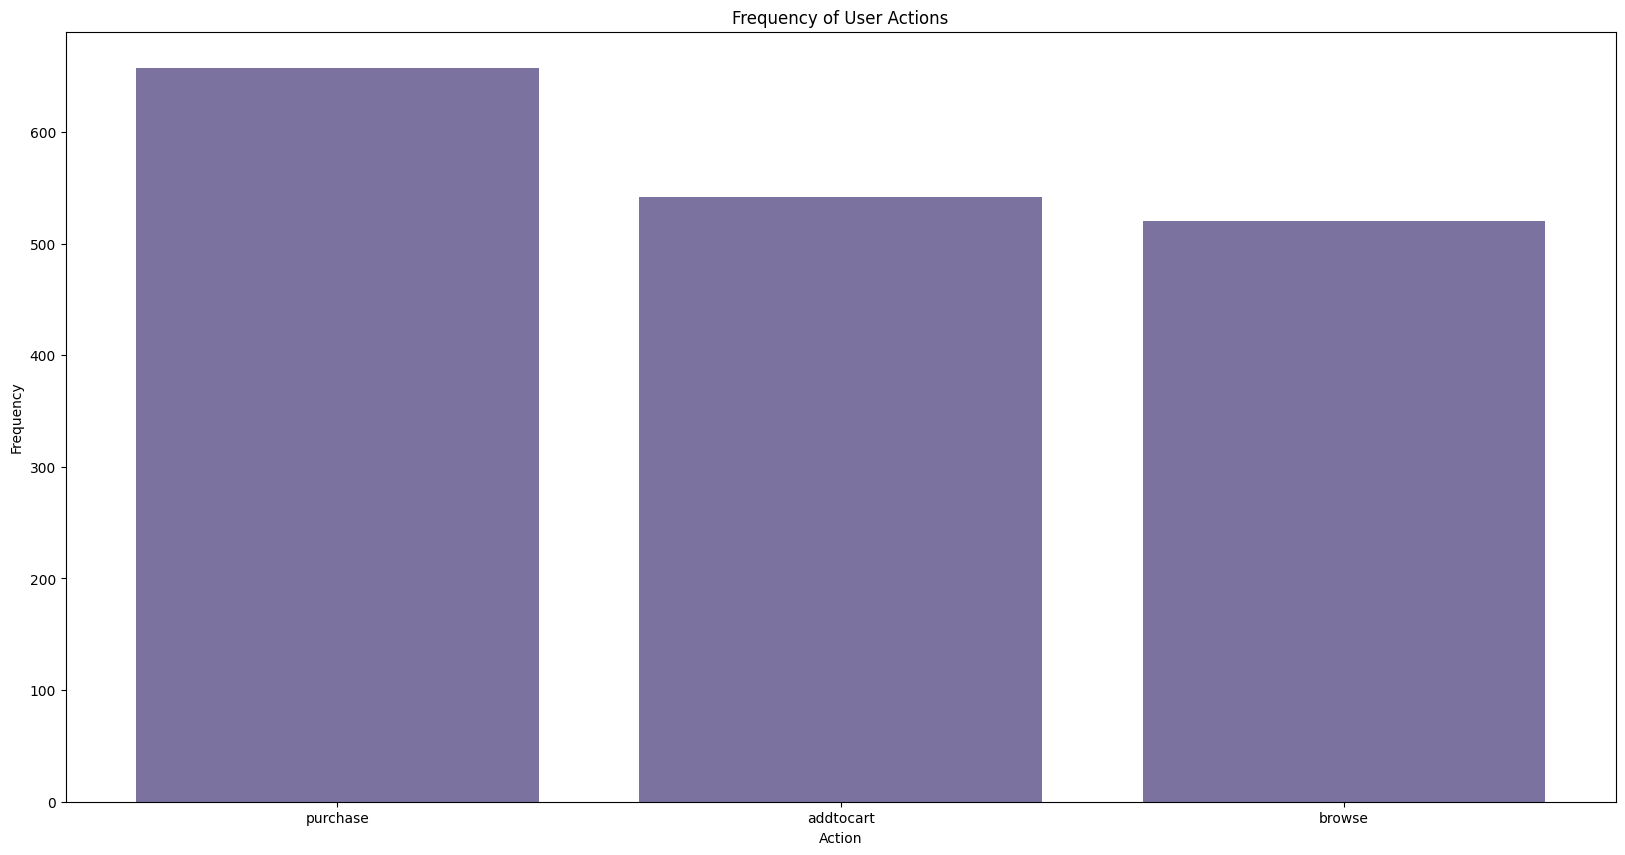

The most common action taken by users is: purchase


In [116]:

# count the occurrences of each action
action_counts = df['action'].value_counts()

# plot the results in a bar chart
plt.figure(figsize=[20,10])
plt.bar(action_counts.index, action_counts.values,color='#7C72A0')
plt.title('Frequency of User Actions')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.show()

# print the most common action
most_common_action = action_counts.index[0]
print('The most common action taken by users is:', most_common_action)

### What are the most popular products in each category?

In [117]:
# Group the dataset by category and product name, and count the occurrences
product_counts = df.groupby(['category', 'producte'])['action'].count().reset_index(name='Count')

# Sort the results by count in descending order
product_counts = product_counts.sort_values(['category', 'Count'], ascending=[True, False])

# Find the top product for each category
top_products = product_counts.groupby('category').head(1).reset_index(drop=True)

# Print the results
print(top_products[['category', 'producte']])


      category    producte
0  accessories    backpack
1     clothing       jeans
2  electronics  headphones
3     footwear       shoes
4      jewelry    necklace


### What is the average time spent on the shopping site by users who make a purchase?

In [118]:
# Filter for users who made a purchase
purchase_users = df[df['action'] == 'purchase']['userid'].unique()

# Calculate the time spent by each user who made a purchase
time_spent = []
for user in purchase_users:
    user_df = df[df['userid'] == user].sort_values('time')
    user_time_spent = (pd.to_datetime(user_df['time'].iloc[-1]) - pd.to_datetime(user_df['time'].iloc[0])).total_seconds()
    time_spent.append(user_time_spent)
# Calculate the average time spent
avg_time_spent = -(sum(time_spent) / (len(time_spent)*60*24))
print("The average time spent on the shopping site by users who made a purchase is:", np.round(avg_time_spent,2), "days")

The average time spent on the shopping site by users who made a purchase is: 3.26 days


### How does the time spent on the site vary by product category and user demographics?

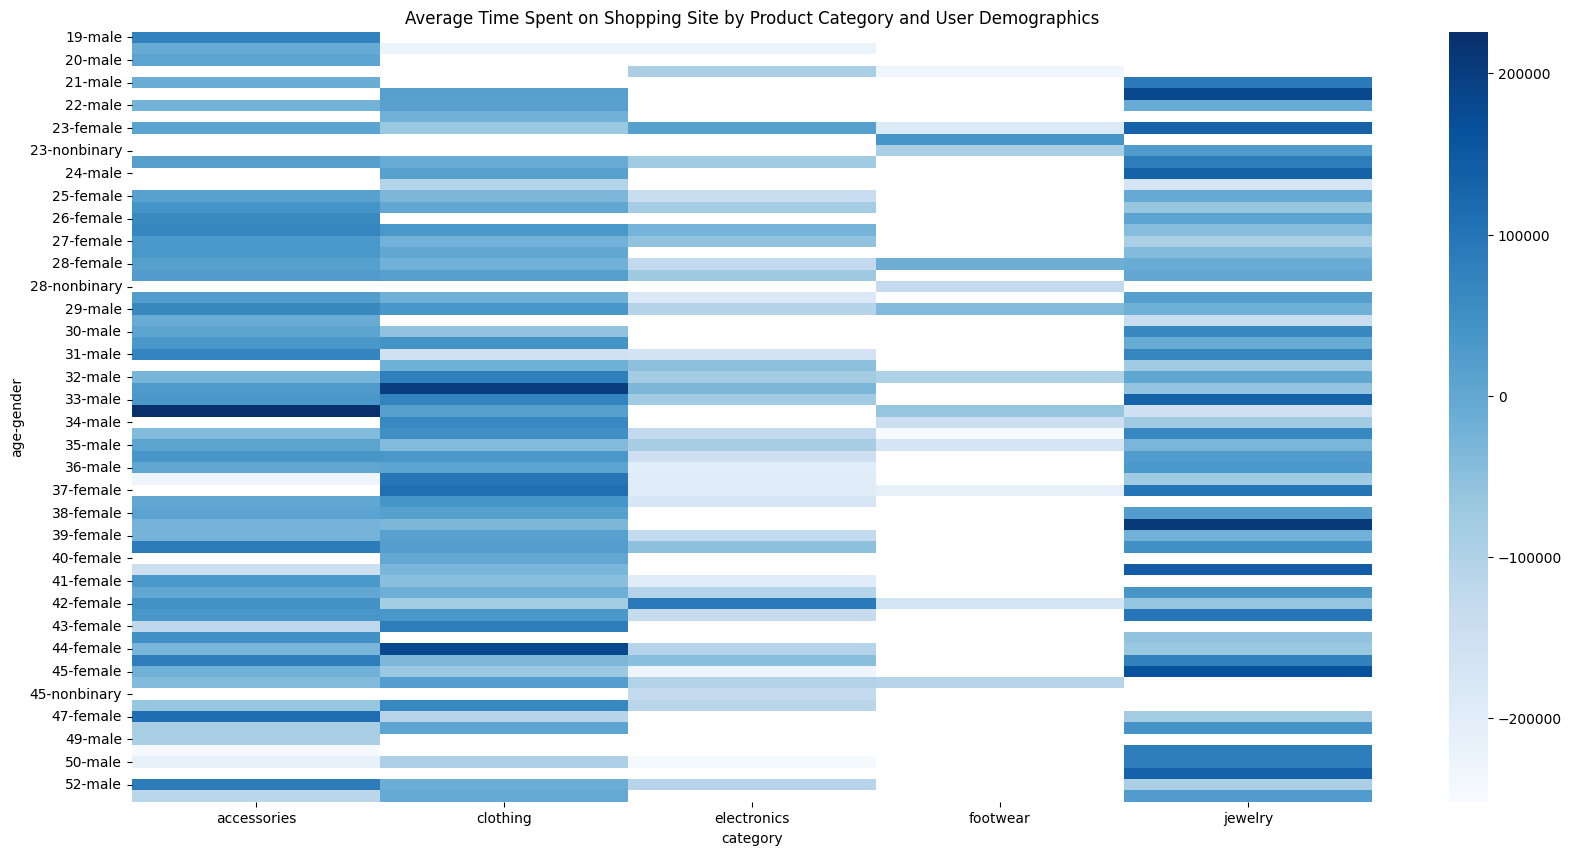

In [119]:
plt.figure(figsize=[20,10])
# convert the Date and Time columns to a datetime object
df['DateTime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# calculate the time spent on the shopping site in minutes
df['TimeSpent'] = df.groupby('userid')['DateTime'].diff().dt.total_seconds().div(60)

# fill in missing values with 0
df['TimeSpent'].fillna(0, inplace=True)

# create a pivot table with user demographics and product categories as rows and columns
pivot_table = pd.pivot_table(df, values='TimeSpent', index=['age', 'gender'], columns=['category'], aggfunc=np.mean)

# create the heatmap using seaborn
sns.heatmap(pivot_table, cmap='Blues')

# set the title of the plot
plt.title('Average Time Spent on Shopping Site by Product Category and User Demographics')

# display the plot
plt.show()


### Are there any patterns in the actions users take based on the time of day or day of week?

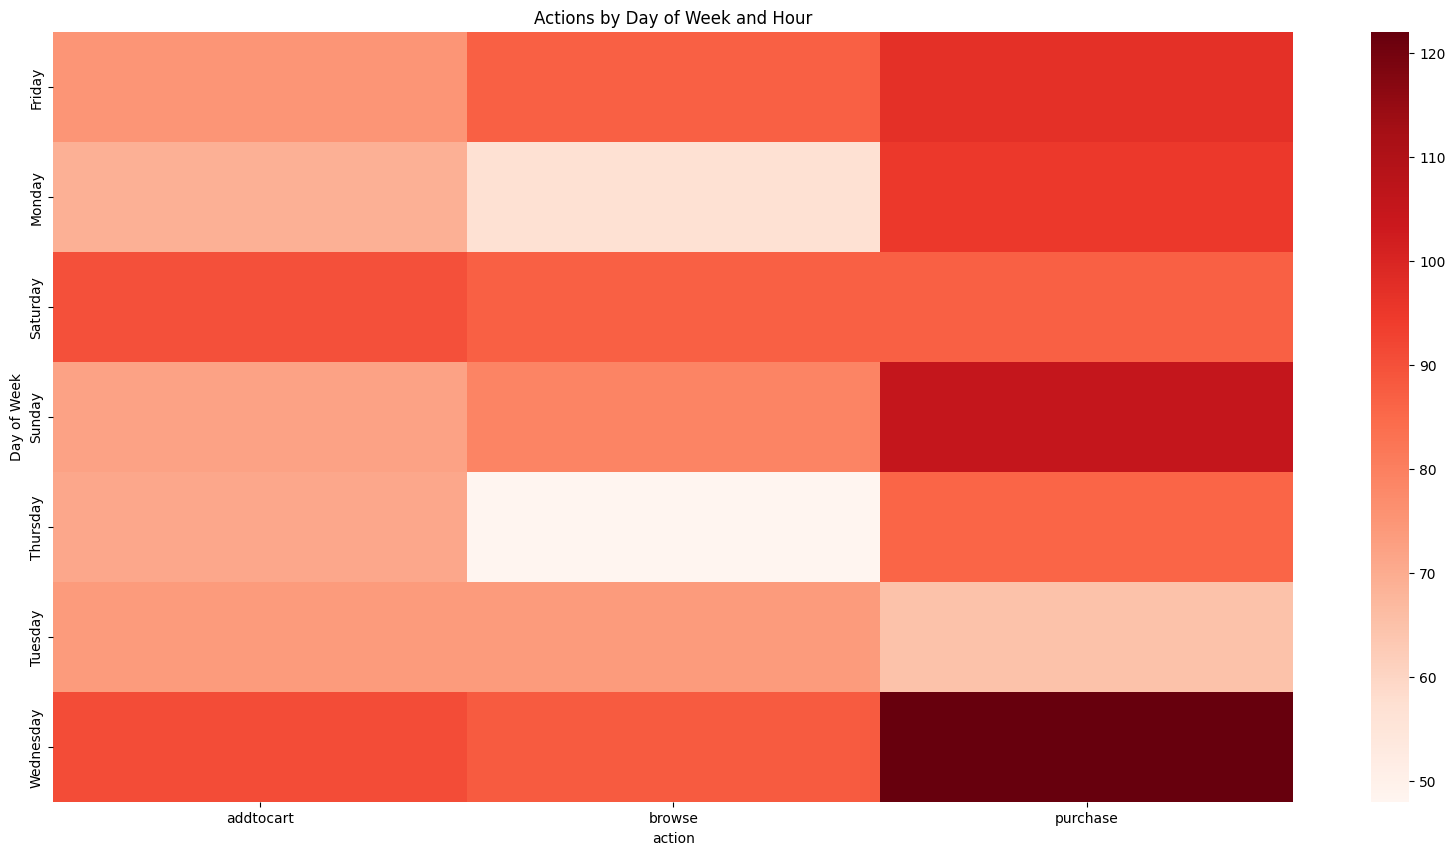

In [120]:
plt.figure(figsize=[20,10])
# Convert 'Date' and 'Time' columns to datetime objects
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time']).dt.hour

# Create a new column 'Day of Week'
df['Day of Week'] = df['date'].dt.day_name()

# Group the data by 'Day of Week' and 'Hour', and count the occurrences of each action
action_count = df.groupby(['Day of Week', 'action'])['action'].count().unstack()

# Visualize the results using a heatmap
sns.heatmap(action_count, cmap='Reds')
plt.title('Actions by Day of Week and Hour')
plt.show()

### How do user demographics (age, gender) affect the likelihood of taking specific actions on the shopping site?

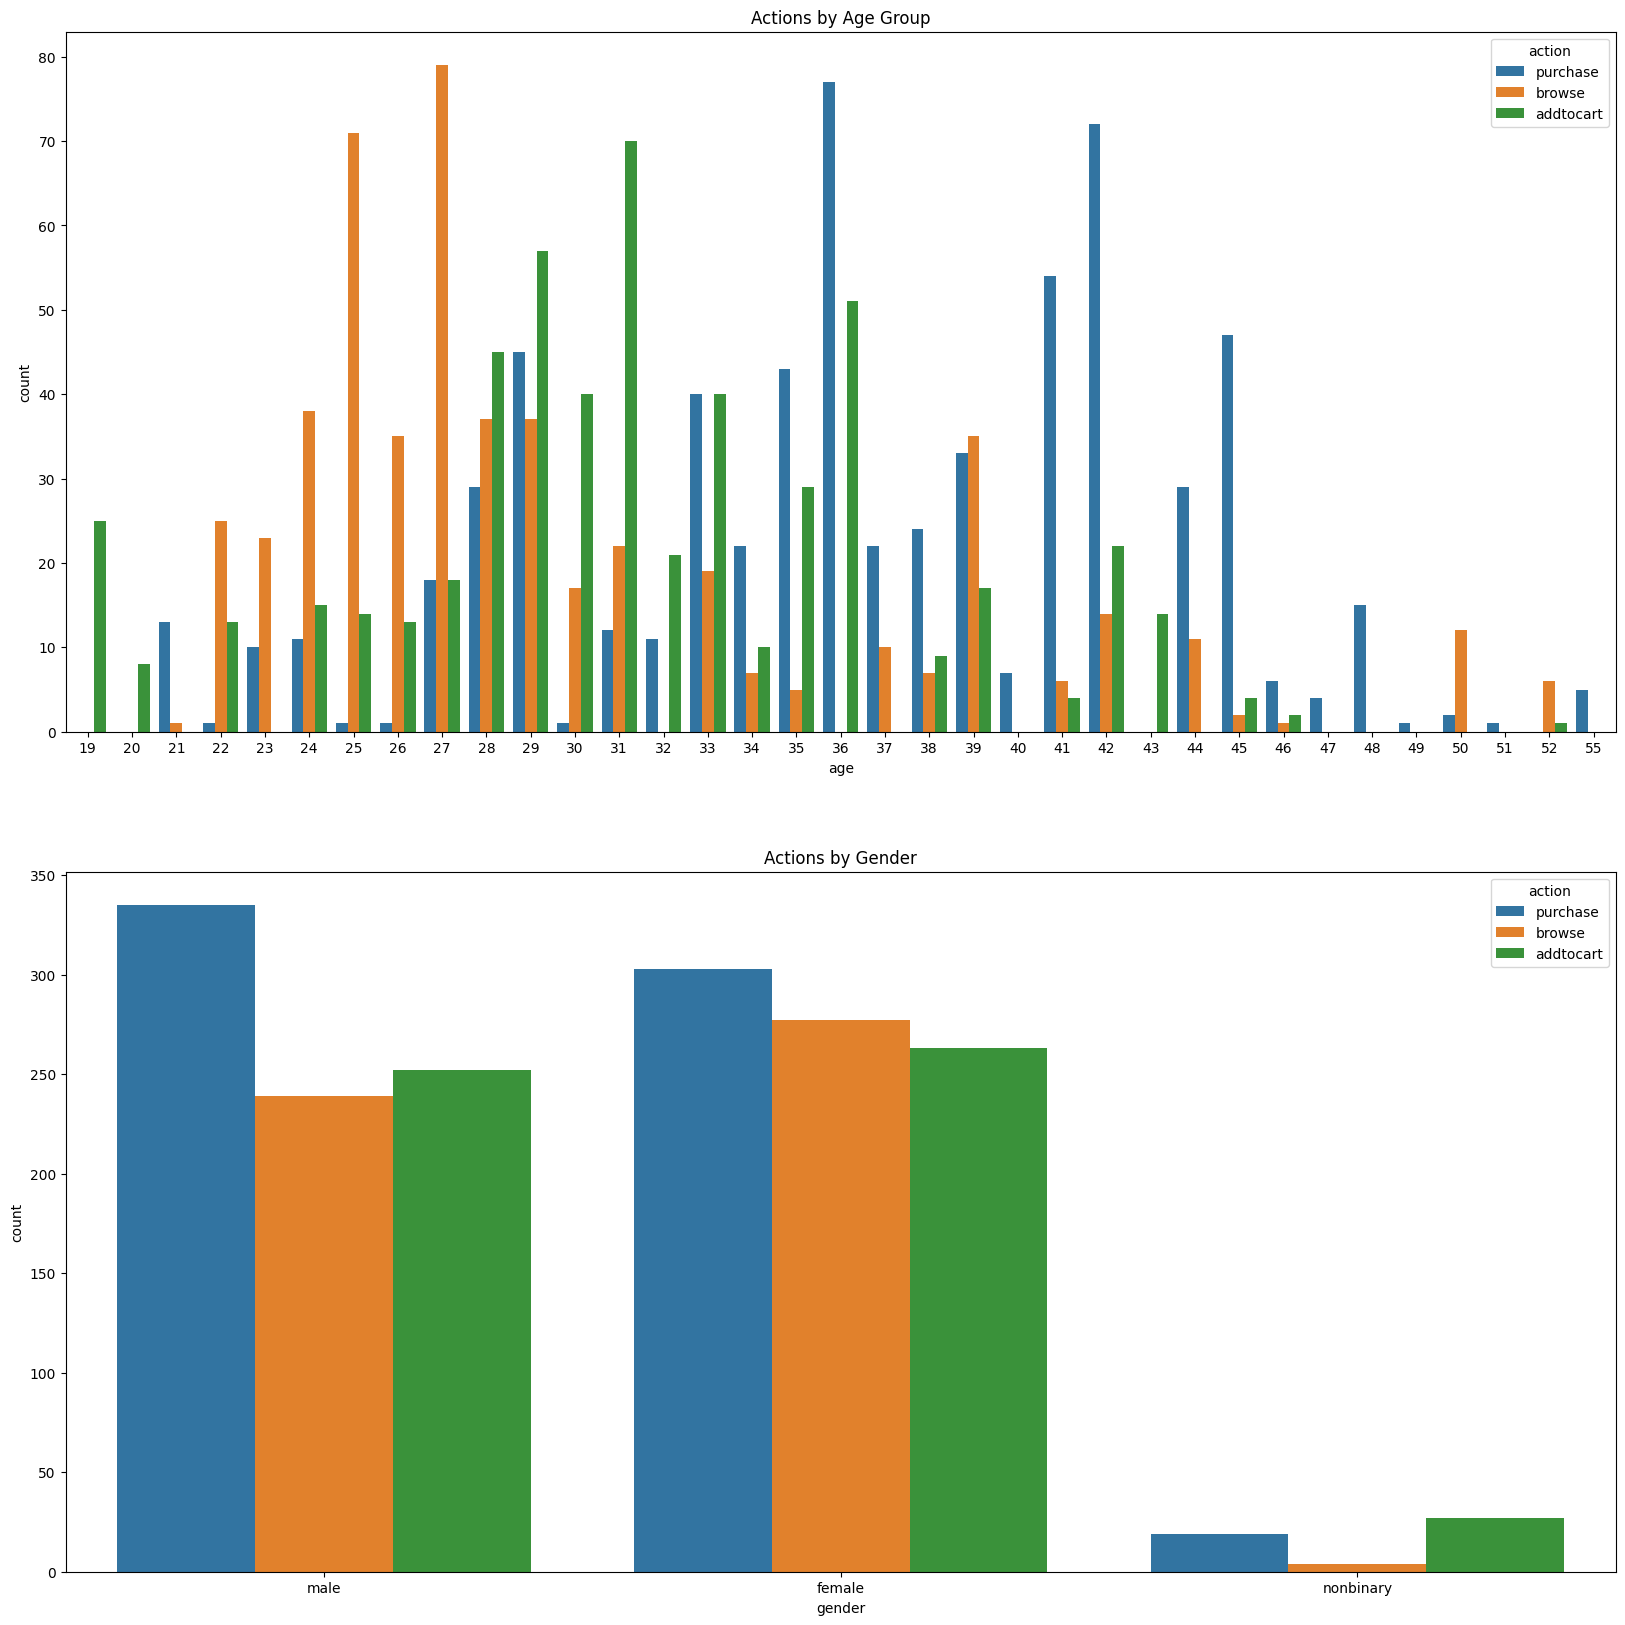

In [121]:
plt.figure(figsize=[20,20])
plt.subplot(2,1,1)
# Count of actions by age group
sns.countplot(x='age', hue='action', data=df)
plt.title('Actions by Age Group')


plt.subplot(2,1,2)
# Count of actions by gender
sns.countplot(x='gender', hue='action', data=df)
plt.title('Actions by Gender')
plt.show()

### How does the frequency of user visits to the shopping site affect their purchase behavior?

In [122]:
# Add a new column to count the number of times each user has visited the site
df['VisitCount'] = df.groupby('userid')['date'].transform('count')

# Group the data by visit count and calculate the purchase rate for each group
visit_count_data = df.groupby('VisitCount').agg({'action': ['count', lambda x: x[x == 'purchase'].count()]})
visit_count_data.columns = ['Total', 'Purchased']
visit_count_data['PurchaseRate'] = visit_count_data['Purchased'] / visit_count_data['Total']

# Print the result
print(visit_count_data)


            Total  Purchased  PurchaseRate
VisitCount                                
175           175         16      0.091429
179           179         67      0.374302
183           183        106      0.579235
191           382        151      0.395288
193           193         18      0.093264
198           198         70      0.353535
204           204         93      0.455882
205           205        136      0.663415


### What is the average time between a user's first visit to the site and their first purchase?

In [123]:
# group the data by user ID and find the earliest visit and purchase date for each user
user_first_visit = df.groupby('userid')['date'].min().reset_index()
user_first_purchase = df[df['action'] == 'purchase'].groupby('userid')['date'].min().reset_index()

# merge the two dataframes to get the first visit and purchase dates for each user
user_first_visit_purchase = user_first_visit.merge(user_first_purchase, on='userid', suffixes=('_visit', '_purchase'))

# calculate the time between the first visit and first purchase for each user
user_first_visit_purchase['Time_to_First_Purchase'] = user_first_visit_purchase['date_purchase'] - user_first_visit_purchase['date_visit']

# calculate the average time between the first visit and first purchase for all users
avg_time_to_first_purchase = user_first_visit_purchase['Time_to_First_Purchase'].mean()

print('The average time between a user\'s first visit and their first purchase is:', avg_time_to_first_purchase)


The average time between a user's first visit and their first purchase is: 5 days 10:40:00


### Which products are frequently viewed but not purchased?

In [124]:
# Calculate view-to-purchase ratio for each product
view_count = df[df['action'] == 'browse']['productid'].value_counts()
purchase_count = df[df['action'] == 'purchase']['productid'].value_counts()
view_purchase_ratio = (view_count - purchase_count) / view_count

# Sort products based on view-to-purchase ratio
most_frequently_viewed = view_purchase_ratio.sort_values(ascending=False).head(10)

# Print the top 10 most frequently viewed but not purchased products
print('Top 10 Most Frequently Viewed But Not Purchased Products:')
for product_id, ratio in most_frequently_viewed.iteritems():
    product_name = df[df['productid'] == product_id]['producte'].iloc[0]
    print(f'{product_name} ({product_id}): {ratio:.2%}')


Top 10 Most Frequently Viewed But Not Purchased Products:
sunglasses (1022): 79.55%
necklace (1020): 75.68%
watch (1025): 62.50%
wallet (1024): 50.00%
scarf (1023): 43.24%
sunglasses (1017): 38.10%
bracelet (1012): 28.57%
fress (1003): 25.81%
backpack (1019): 22.22%
backpack (1014): 15.38%


### Which category tend to make the customer checkout?

In [125]:
# Calculate conversion rate by category
conversion_rate = df[df['action'] == 'purchase'].groupby('category')['action'].count() / df.groupby('category')['action'].count()

# Sort categories by conversion rate in descending order
conversion_rate_sorted = conversion_rate.sort_values(ascending=False)

# Print conversion rate by category
print(conversion_rate_sorted)


category
electronics    0.652174
footwear       0.516129
clothing       0.438330
jewelry        0.330709
accessories    0.306892
Name: action, dtype: float64


### How does the purchase behavior of new users compare to that of repeat users?

In [126]:
# Calculate conversion rate for new users
new_users = df[df['newuser'] == 'yes']
new_conversion_rate = len(new_users[new_users['action'] == 'purchase']) / len(new_users)

# Calculate conversion rate for repeat users
repeat_users = df[df['newuser'] == 'no']
repeat_conversion_rate = len(repeat_users[repeat_users['action'] == 'purchase']) / len(repeat_users)

# Print results
print(f"Conversion rate for new users: {np.round(new_conversion_rate,2)}")
print(f"Conversion rate for repeat users: {np.round(repeat_conversion_rate,2)}")


Conversion rate for new users: 0.1
Conversion rate for repeat users: 0.52


# Thank you.